**Iris Dataset Normal Neural Network**

Dataset shape: (150, 4)
Number of classes: 3
Class distribution: [50 50 50]
Training set shape: (120, 4)
Training labels shape: (120,)
Validation set shape: (30, 4)
Validation labels shape: (30,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.2415 - loss: 1.4569 - val_accuracy: 0.1333 - val_loss: 1.3587
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2940 - loss: 1.3902 - val_accuracy: 0.2000 - val_loss: 1.3295
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3198 - loss: 1.3586 - val_accuracy: 0.2333 - val_loss: 1.3023
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2444 - loss: 1.3824 - val_accuracy: 0.2667 - val_loss: 1.2771
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3152 - loss: 1.3353 - val_accuracy: 0.2667 - val_loss: 1.2536
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3179 - loss: 1.2756 - val_accuracy: 0.3000 - val_loss: 1.2315
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3744 - loss: 1.2808 - val_accuracy: 0.3333 - val_loss: 1.2106
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3396 - loss: 1.2825 - val_accuracy: 0.4000 - val_loss

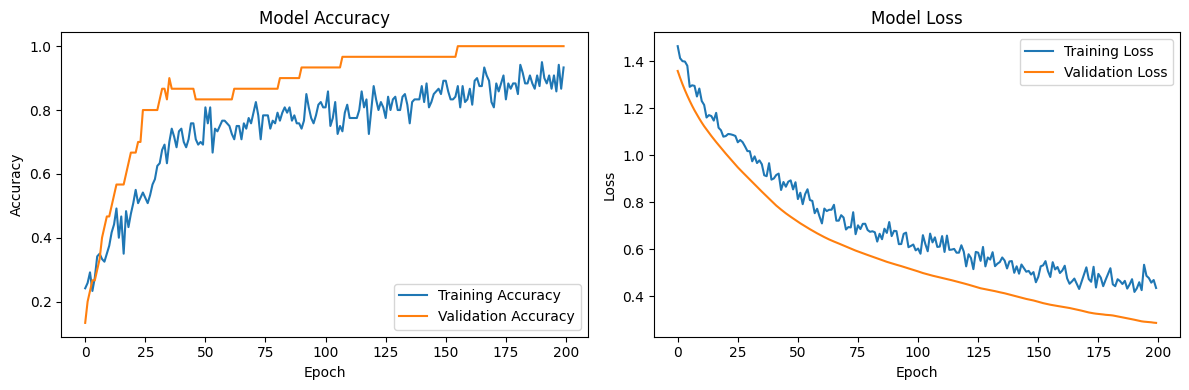

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print dataset information
print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))
print("Class distribution:", np.bincount(y))

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes after splitting
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation set shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

# Define a simple neural network
model = Sequential([
    Dense(16, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val),
    batch_size=32
)

# Evaluate the model
evaluation = model.evaluate(X_val, y_val)
print(f"Model Evaluation - Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Make predictions
predictions = model.predict(X_scaled)
print("Predictions (first 10 samples):")
print(predictions[:10])

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
print("\nPredicted classes (first 10 samples):")
print(predicted_classes[:10])
print("\nTrue classes (first 10 samples):")
print(y[:10])

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Iris Dataset Chaos Monkey Network**

Dataset shape: (150, 4)
Number of classes: 3
Class distribution: [50 50 50]
Training set shape: (120, 4)
Validation set shape: (30, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.2215 - loss: 1.4360 - val_accuracy: 0.2667 - val_loss: 1.3724
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3621 - loss: 1.4008 - val_accuracy: 0.2667 - val_loss: 1.3348
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3329 - loss: 1.3383 - val_accuracy: 0.2667 - val_loss: 1.3006
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3069 - loss: 1.3470 - val_accuracy: 0.2667 - val_loss: 1.2695
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4229 - loss: 1.2532 - val_accuracy: 0.2667 - val_loss: 1.2408
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4481 - loss: 1.2159 - val_accuracy: 0.2667 - val_loss: 1.2145
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4231 - loss: 1.2210 - val_accuracy: 0.2667 - val_loss: 1.1898
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4115 - loss: 1.2176 - val_accuracy: 0.3000 - val_loss:

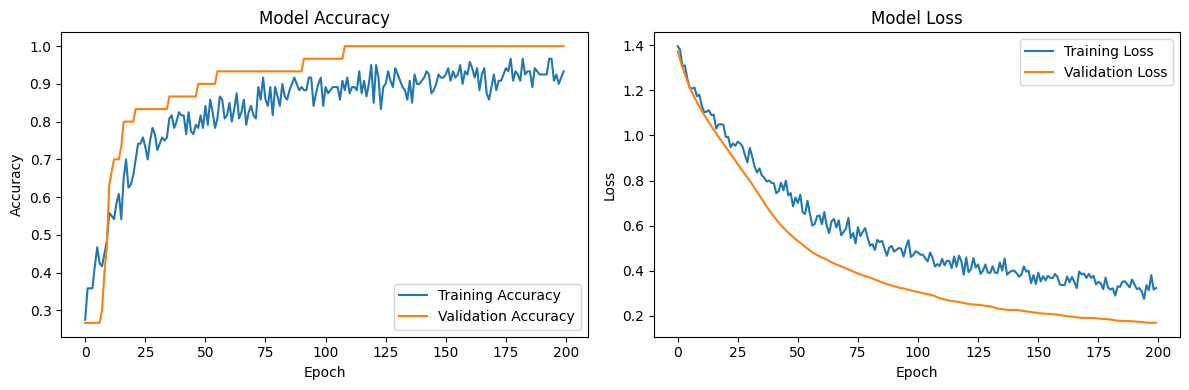

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the Chaos Monkey layer
class ChaosMonkeyLayer(tf.keras.layers.Layer):
    def __init__(self, chaos_probability=0.1, **kwargs):
        super(ChaosMonkeyLayer, self).__init__(**kwargs)
        self.chaos_probability = chaos_probability

    def call(self, inputs, training=None):
        if training:
            random_values = tf.random.uniform(shape=tf.shape(inputs))
            mask = tf.cast(random_values > self.chaos_probability, dtype=tf.float32)
            return inputs * mask
        return inputs

# Load and prepare the Iris dataset
iris = load_iris()
X, y = shuffle(iris.data, iris.target, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset information
print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))
print("Class distribution:", np.bincount(y))
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Define the model with Chaos Monkey layers
model = Sequential([
    Dense(32, input_shape=(4,), activation='relu', kernel_regularizer=l2(0.01)),
    ChaosMonkeyLayer(chaos_probability=0.1),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    ChaosMonkeyLayer(chaos_probability=0.1),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

def adjust_chaos_probability(epoch, logs):
    for layer in model.layers:
        if isinstance(layer, ChaosMonkeyLayer):
            layer.chaos_probability = max(0.05, 0.1 * (1 - epoch / 100))

chaos_callback = LambdaCallback(on_epoch_begin=adjust_chaos_probability)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping, chaos_callback],
    validation_data=(X_val, y_val),
    batch_size=32
)

# Evaluate the model
evaluation = model.evaluate(X_val, y_val)
print(f"Model Evaluation - Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Make predictions
predictions = model.predict(X_scaled)
predicted_classes = np.argmax(predictions, axis=1)

print("\nPredicted classes (first 10 samples):")
print(predicted_classes[:10])
print("\nTrue classes (first 10 samples):")
print(y[:10])

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Wine Dataset Normal Neural Network**

Dataset shape: (178, 13)
Number of features: 13
Number of classes: 3
Class distribution: [59 71 48]
Training set shape: (142, 13)
Validation set shape: (36, 13)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3194 - loss: 1.7343 - val_accuracy: 0.3611 - val_loss: 1.5097
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4419 - loss: 1.6548 - val_accuracy: 0.5833 - val_loss: 1.4027
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4388 - loss: 1.4876 - val_accuracy: 0.6667 - val_loss: 1.3144
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6012 - loss: 1.3741 - val_accuracy: 0.6944 - val_loss: 1.2418
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6092 - loss: 1.3117 - val_accuracy: 0.7778 - val_loss: 1.1807
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6277 - loss: 1.2903 - val_accuracy: 0.8333 - val_loss: 1.1274
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6711 - loss: 1.2166 - val_accuracy: 0.8611 - val_loss: 1.0788
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7241 - loss: 1.1817 - val_accuracy: 0.8611 - val_loss: 1.0347
Epoc

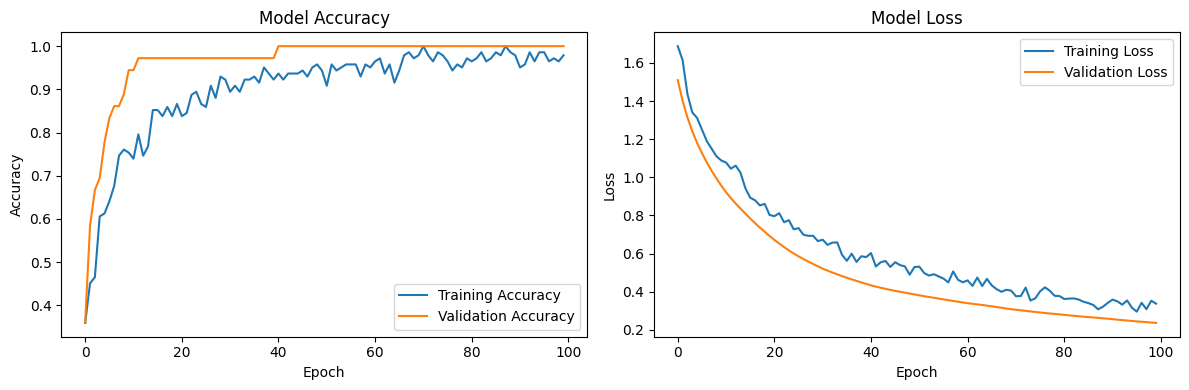

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and prepare the Wine dataset
wine = load_wine()
X, y = shuffle(wine.data, wine.target, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset information
print("Dataset shape:", X.shape)
print("Number of features:", X.shape[1])
print("Number of classes:", len(np.unique(y)))
print("Class distribution:", np.bincount(y))
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Define the model (Standard Neural Network without Chaos Monkey)
model = Sequential([
    Dense(32, input_shape=(13,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val),
    batch_size=32
)

# Evaluate the model
evaluation = model.evaluate(X_val, y_val)
print(f"Model Evaluation - Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Make predictions
predictions = model.predict(X_scaled)
predicted_classes = np.argmax(predictions, axis=1)

print("\nPredicted classes (first 10 samples):")
print(predicted_classes[:10])
print("\nTrue classes (first 10 samples):")
print(y[:10])

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Wine Dataset Chaos Monkey Network**

Dataset shape: (178, 13)
Number of features: 13
Number of classes: 3
Class distribution: [59 71 48]
Training set shape: (142, 13)
Validation set shape: (36, 13)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2337 - loss: 1.9466 - val_accuracy: 0.1944 - val_loss: 1.7937
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2496 - loss: 1.9106 - val_accuracy: 0.2222 - val_loss: 1.6718
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2316 - loss: 1.7532 - val_accuracy: 0.2500 - val_loss: 1.5659
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2908 - loss: 1.7036 - val_accuracy: 0.2500 - val_loss: 1.4748
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3122 - loss: 1.6005 - val_accuracy: 0.3056 - val_loss: 1.3949
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3404 - loss: 1.6076 - val_accuracy: 0.3056 - val_loss: 1.3256
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3403 - loss: 1.5302 - val_accuracy: 0.3056 - val_loss: 1.2645
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4204 - loss: 1.4277 - val_accuracy: 0.4722 - val_loss: 1.2078
Epoch 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Predicted classes (first 10 samples):
[0 0 2 0 1 0 1 2 1 2]

True classes (first 10 samples):
[0 0 2 0 1 0 1 2 1 2]

Confusion Matrix:
[[59  0  0]
 [ 0 70  1]
 [ 0  0 48]]


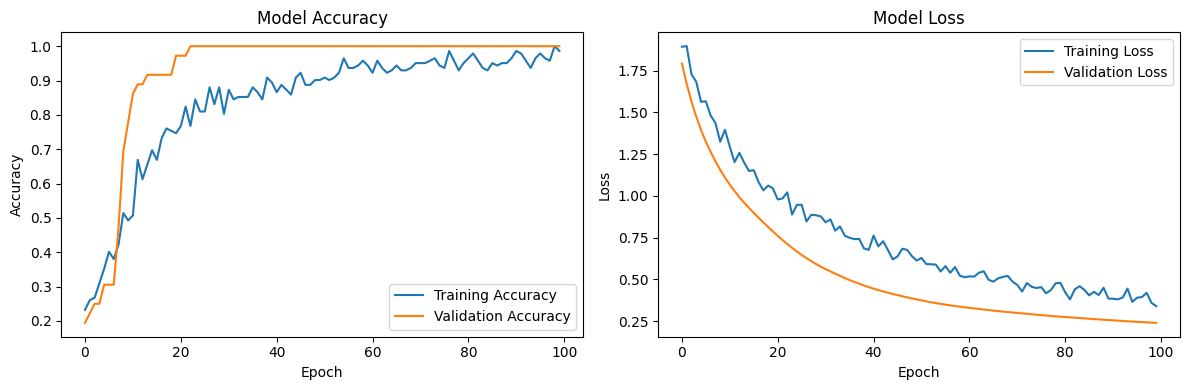

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the Chaos Monkey layer
class ChaosMonkeyLayer(tf.keras.layers.Layer):
    def __init__(self, chaos_probability=0.1, **kwargs):
        super(ChaosMonkeyLayer, self).__init__(**kwargs)
        self.chaos_probability = chaos_probability

    def call(self, inputs, training=None):
        if training:
            random_values = tf.random.uniform(shape=tf.shape(inputs))
            mask = tf.cast(random_values > self.chaos_probability, dtype=tf.float32)
            return inputs * mask
        return inputs

# Load and prepare the Wine dataset
wine = load_wine()
X, y = shuffle(wine.data, wine.target, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset information
print("Dataset shape:", X.shape)
print("Number of features:", X.shape[1])
print("Number of classes:", len(np.unique(y)))
print("Class distribution:", np.bincount(y))
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Define the model with Chaos Monkey layers
model = Sequential([
    Dense(32, input_shape=(13,), activation='relu', kernel_regularizer=l2(0.01)),
    ChaosMonkeyLayer(chaos_probability=0.1),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    ChaosMonkeyLayer(chaos_probability=0.1),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

def adjust_chaos_probability(epoch, logs):
    for layer in model.layers:
        if isinstance(layer, ChaosMonkeyLayer):
            layer.chaos_probability = max(0.05, 0.1 * (1 - epoch / 100))

chaos_callback = LambdaCallback(on_epoch_begin=adjust_chaos_probability)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping, chaos_callback],
    validation_data=(X_val, y_val),
    batch_size=32
)

# Evaluate the model
evaluation = model.evaluate(X_val, y_val)
print(f"Model Evaluation - Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Make predictions
predictions = model.predict(X_scaled)
predicted_classes = np.argmax(predictions, axis=1)

print("\nPredicted classes (first 10 samples):")
print(predicted_classes[:10])
print("\nTrue classes (first 10 samples):")
print(y[:10])

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()